# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

## Read-in Data

In [2]:
subreddits = pd.read_csv('../data/subreddits_preprocessed.csv')
subreddits.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
subreddits.head(2)

,title,selftext,subreddit,author,num_comments,score,timestamp,original_text,post_length_char,post_length_words,is_unethical,stemmer_text,polarity,sentiment_cat
0,: Answers to why,NaN,LifeProTips,AlienAgency,2,1,2020-07-17,: Answers to why,16,4,0,: answer to whi,0.0,Neutral
1,¿Quieres obtener juegos y premios gratis en tu...,NaN,LifeProTips,GarbageMiserable0x0,2,1,2020-07-17,¿Quieres obtener juegos y premios gratis en tu...,60,10,0,¿quier obten juego y premio grati en tu tiempo...,0.0,Neutral


## Set Palette for Visualizations

In [4]:
red = '#e63946'
cream = 'f1faee'
light_blue = '#a8dadc'
medium_blue = '#457b9d'
navy = '#1d3557'

## Functions

In [5]:
def set_labels(title, xlabel, ylabel, title_size = 16, axis_size = 13):
    plt.title(title, fontdict = {'fontsize':title_size}, pad = 10)
    plt.xlabel(xlabel, fontdict = {'fontsize': axis_size})
    plt.ylabel(ylabel, fontdict = {'fontsize':13});

In [6]:
def create_v_boxplot(df, feature, fig_size = (8,6)):
    plt.figure(figsize=fig_size)
    sns.boxplot(df[feature], orient = 'v')
    plt.tight_layout;

In [7]:
def create_hist(df, feature, num_bins=10):
    sns.distplot(df[feature], bins = num_bins, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))

In [8]:
def create_bar_xticks(df, x_col, y_col, hue=None, color = medium_blue, plot_size = (10,6), lw = 1.5, x_tick_labels = None, palette = None):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black', palette = palette)
    ax.set_xticklabels(x_tick_labels)
    plt.tight_layout;

In [9]:
def get_frequent_words(df, words_df, feature, binary_num):
    
    # Generate Word Counts
    feature_var = df[df[feature] == binary_num]
    feature_word_counts = {}

    for column in words_df.columns:
        feature_word_counts[column] = feature_var[column].sum()

    feature_word_counts_df = pd.DataFrame(sorted(feature_word_counts.items(), key = lambda x: x[1], reverse = True), columns = ['Word', 'Count'])
    return feature_word_counts_df.sort_values('Count', ascending = False)

In [10]:
def plot_frequent_words(word_count_df, subreddit):
    plt.figure(figsize = (18, 6))
    sns.barplot(word_count_df['Word'][:25], word_count_df['Count'].sort_values(ascending = False)[:25], palette = 'Blues_r', edgecolor = 'black')
    plt.title(f'25 Most Commonly Used Words in {subreddit}', fontdict = {'fontsize':15}, pad = 12)
    plt.xlabel('Word', fontdict = {'fontsize':13}, labelpad = 10)
    plt.ylabel('Count', fontdict = {'fontsize':13}, labelpad = 10)
    plt.tight_layout;

## Exploration of Authors

In [11]:
lpt_authors = subreddits[subreddits['subreddit'] == 'LifeProTips']['author']
ulpt_authors = subreddits[subreddits['subreddit'] == 'UnethicalLifeProTips']['author']

### What percentage of authors are unique?

In [12]:
lpt_authors.nunique()/len(lpt_authors)

0.7485970819304153

In [13]:
ulpt_authors.nunique()/len(ulpt_authors)

0.7806330303979944

The percentage of unique authors between the two subreddits is similar.

### Do any authors appear in both subreddits?

In [14]:
lpt_authors_set = set(lpt_authors)
ulpt_authors_set = set(ulpt_authors)

In [15]:
authors_in_common = lpt_authors_set & ulpt_authors_set

In [16]:
print('Authors in Common:', len(authors_in_common)) # Intersection

Authors in Common: 17


There are 17 authors who have posted on both subreddits.

### Do the common authors post unique content?

An exploration of the posts revealed that the posts that have been written by the same authors are unique. 

## Compare Distributions of Numerical Data Between Subreddits

In [17]:
life_pro_tips = subreddits[subreddits['subreddit'] == 'LifeProTips']
unethical_life_pro_tips = subreddits[subreddits['subreddit'] == 'UnethicalLifeProTips']

### Number of Comments

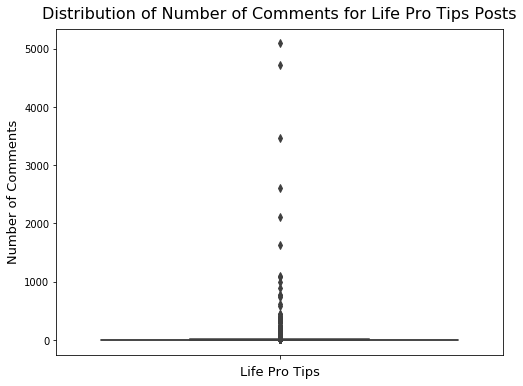

In [18]:
create_v_boxplot(life_pro_tips, 'num_comments')
set_labels('Distribution of Number of Comments for Life Pro Tips Posts', 'Life Pro Tips', 'Number of Comments');

As shown in the boxplot above, the range of number of comments for Life Pro Tips posts, is highly spread out. The minimum number of comments is 0, and the maximum number of comments is 5091. The interquartile range is from 2 comments to 8 comments. Only 653 out of the 2678 posts have more than 8 comments. These 653 posts appear as outliers in the boxplot. However, because posts with more comments could be a distinguishing feature between the subreddits, all points outside of the interquartile range will be kept in the dataset.

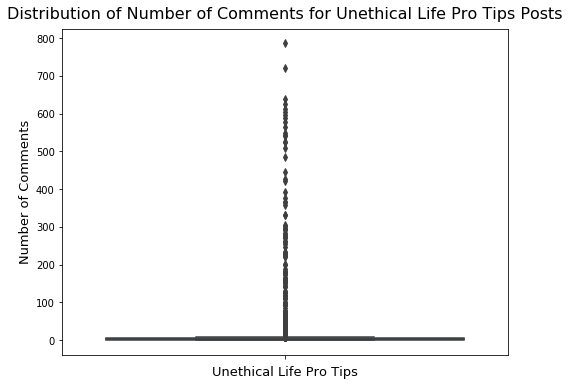

In [19]:
create_v_boxplot(unethical_life_pro_tips, 'num_comments')
set_labels('Distribution of Number of Comments for Unethical Life Pro Tips Posts', 'Unethical Life Pro Tips', 'Number of Comments');

Similar to the number of comments for Life Pro Tips Posts, we see that the range for number of comments for posts in Unethical Life Pro Tips is also highly spread out. The minimum number of comments is 0, and the maximum number of comments is 786. For Unethical Life Pro Tips, 75% of the posts have 4 or less comments. Only 791 out of 3194 comments have comment counts than 4, and many of these posts appear as outliers on the boxplot. However, again, because the variation in comments could be an important feature for distinguishing between the two subreddits, all posts will remain in the dataset.

### Score

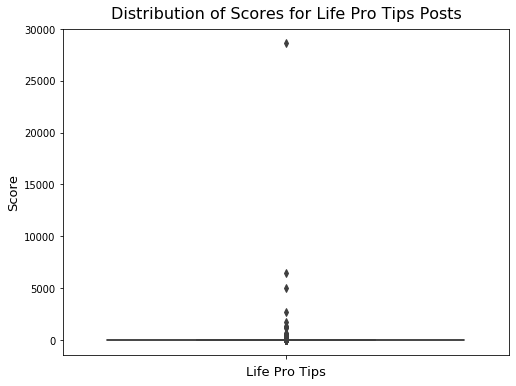

In [20]:
create_v_boxplot(life_pro_tips, 'score')
set_labels('Distribution of Scores for Life Pro Tips Posts', 'Life Pro Tips', 'Score');

Similar to the distributions for number of comments, the range of scores for Life Pro Tips posts is also highly variable. The range is from 0 to 28606, with 75% of posts having a score of 1 or less. Only 432 out of 2678 posts have a score higher than 1. Likely the posts with a high score became very popular and were featured on the main Reddit page. Again, because these high scores could hold important information, they will not be dropped.

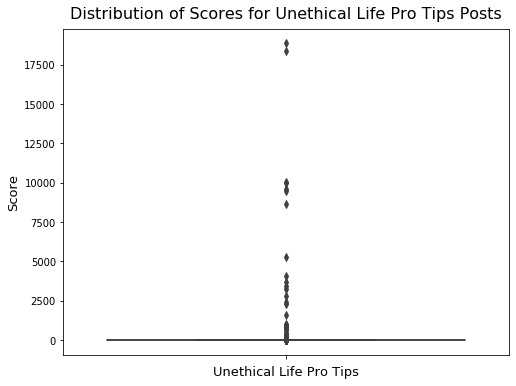

In [21]:
create_v_boxplot(unethical_life_pro_tips, 'score')
set_labels('Distribution of Scores for Unethical Life Pro Tips Posts', 'Unethical Life Pro Tips', 'Score');

In [22]:
unethical_life_pro_tips['score'].describe()

count     3191.000000
mean        41.411783
std        627.448833
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      18861.000000
Name: score, dtype: float64

The scores for Unethical Life Pro Tips are highly variable. The min score is 0, and the max score is 18,861. 75% of all posts have a score of 1 or less, so many posts appear as outliers on this figure.

### Post Length (Characters)

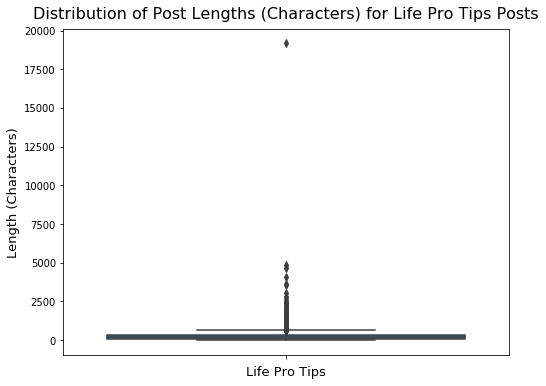

In [23]:
create_v_boxplot(life_pro_tips, 'post_length_char')
set_labels('Distribution of Post Lengths (Characters) for Life Pro Tips Posts', 'Life Pro Tips', 'Length (Characters)');

As shown in the boxplot above, there is a large range of post lengths in the dataset. The length in characters ranges from 1 character to 19164 characters, and 75% of all posts are 306.75 characters or less. Because the post with 19164 characters appears to be a guidebook, it will be dropped from the dataset. With the column dropped, the max length becomes 4856 characters.

In [24]:
# Drop column from original data set
subreddits.drop(308, inplace = True)

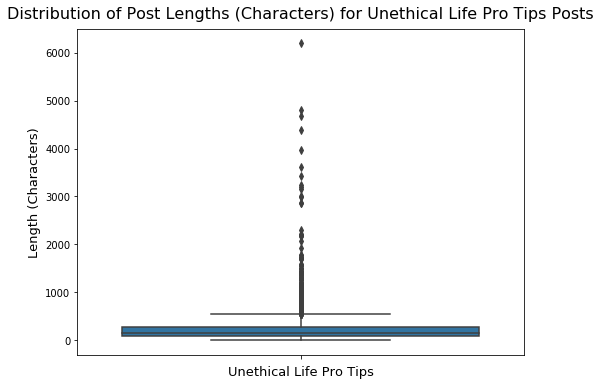

In [25]:
create_v_boxplot(unethical_life_pro_tips, 'post_length_char')
set_labels('Distribution of Post Lengths (Characters) for Unethical Life Pro Tips Posts', 'Unethical Life Pro Tips', 'Length (Characters)');

The range of lengths for posts in Unethical Life Pro Tips is also highly variable. The minimum post length is 2 characters, and the maximum is 6193 characters. 75% of posts are 266 characters or shorter. 

### Post Length (Words)

In [26]:
life_pro_tips['post_length_words'].describe()

count    2673.000000
mean       51.158997
std        91.192313
min         1.000000
25%        15.000000
50%        30.000000
75%        56.000000
max      3342.000000
Name: post_length_words, dtype: float64

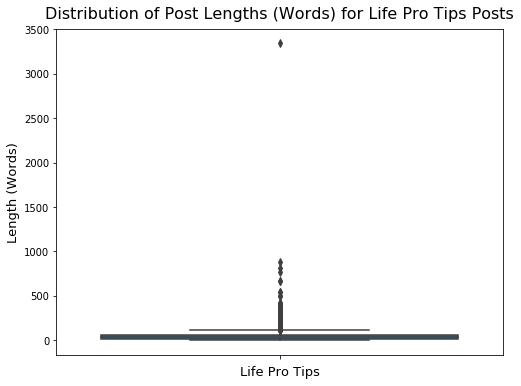

In [27]:
create_v_boxplot(life_pro_tips, 'post_length_words')
set_labels('Distribution of Post Lengths (Words) for Life Pro Tips Posts', 'Life Pro Tips', 'Length (Words)');

As shown above, there are still several posts whose lengths are considered outliers. The minimum length is 1 word, and the maximum length is 881 words. The median value is 29 words, and 75% of posts are 56 words or shorter.

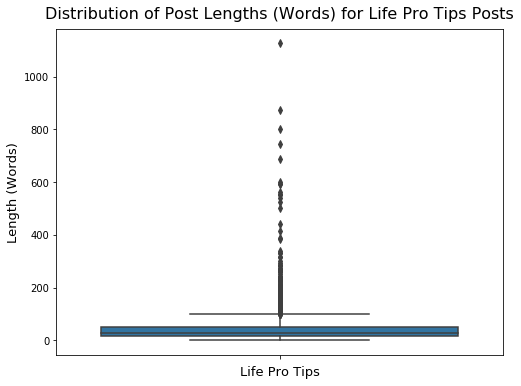

In [28]:
create_v_boxplot(unethical_life_pro_tips, 'post_length_words')
set_labels('Distribution of Post Lengths (Words) for Life Pro Tips Posts', 'Life Pro Tips', 'Length (Words)');

The range of variables for the word counts of Unethical Life Pro Tips posts is also large. The minimum value is 1, and the maximum value is 1125. The median length is 29, and 75% of posts are 48 words or fewer.

## Compare Average Post Lengths Between Subreddits

In [29]:
subreddits.head(1)

,title,selftext,subreddit,author,num_comments,score,timestamp,original_text,post_length_char,post_length_words,is_unethical,stemmer_text,polarity,sentiment_cat
0,: Answers to why,NaN,LifeProTips,AlienAgency,2,1,2020-07-17,: Answers to why,16,4,0,: answer to whi,0.0,Neutral


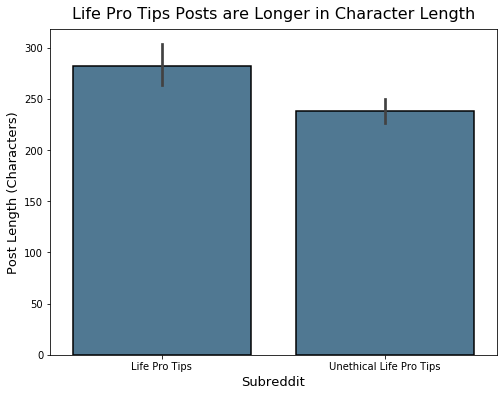

In [30]:
create_bar_xticks(df = subreddits,
                 x_col = 'subreddit',
                 y_col = 'post_length_char',
                 x_tick_labels = ['Life Pro Tips', 'Unethical Life Pro Tips'], plot_size = (8,6))
set_labels(title = 'Life Pro Tips Posts are Longer in Character Length', xlabel = 'Subreddit', ylabel = 'Post Length (Characters)')

The posts on Life Pro Tips are longer than the posts on Unethical Life Pro Tips. The mean character count for posts on Life Pro Tips is 274, while the mean character count for posts on Unethical Life Pro Tips is 238. It is important to note that the range of post lengths is big for Life Pro Tips, and this influences the mean.

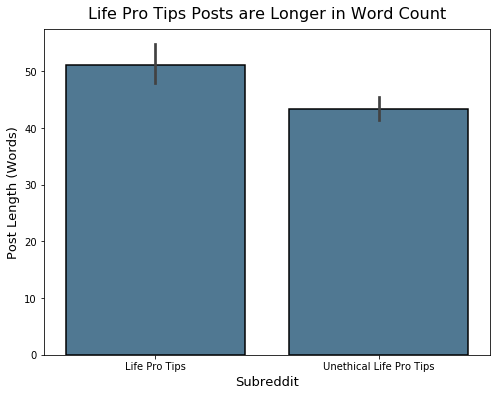

In [31]:
create_bar_xticks(df = subreddits,
                 x_col = 'subreddit',
                 y_col = 'post_length_words',
                 x_tick_labels = ['Life Pro Tips', 'Unethical Life Pro Tips'], plot_size = (8,6))
set_labels(title = 'Life Pro Tips Posts are Longer in Word Count', xlabel = 'Subreddit', ylabel = 'Post Length (Words)')

The posts on Life Pro Tips are longer than the posts on Unethical Life Pro Tips. The mean word count for posts on Life Pro Tips is 49.9 words, while the mean word count for posts on Unethical Life Pro Tips is 43.5 words. It is important to note that the range of post lengths is big for Life Pro Tips, and this influences the mean.

## Create 'Bag of Words' for EDA

In [33]:
# Original Text
og_corpus = subreddits['original_text']
og_cvec = CountVectorizer(stop_words = 'english', ngram_range = (1, 2), min_df = 5)
og_words = og_cvec.fit_transform(og_corpus)
og_words_df = pd.DataFrame(og_words.toarray(), columns = og_cvec.get_feature_names())
og_labeled_words_df = pd.concat([og_words_df, subreddits['is_unethical']], axis = 1)

In [35]:
# Stemmed Text
stemmed_corpus = subreddits['stemmer_text']
stemmed_cvec = CountVectorizer(stop_words = 'english', ngram_range = (1, 2), min_df = 5)
stemmed_words = stemmed_cvec.fit_transform(stemmed_corpus)
stemmed_words_df = pd.DataFrame(stemmed_words.toarray(), columns = stemmed_cvec.get_feature_names())
stemmed_labeled_words_df = pd.concat([stemmed_words_df, subreddits['is_unethical']], axis = 1)

### Plot Most Frequent Words By Subreddit

#### Original Text

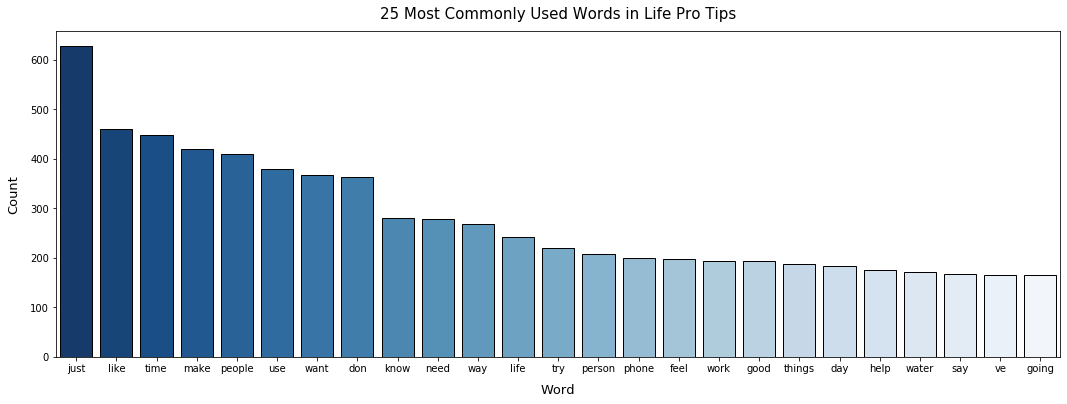

In [36]:
og_lpt_words_df = get_frequent_words(og_labeled_words_df, og_words_df, 'is_unethical', 0)
plot_frequent_words(og_lpt_words_df, 'Life Pro Tips')

The above figure shows the most common words in the Life Pro Tips Subreddit.

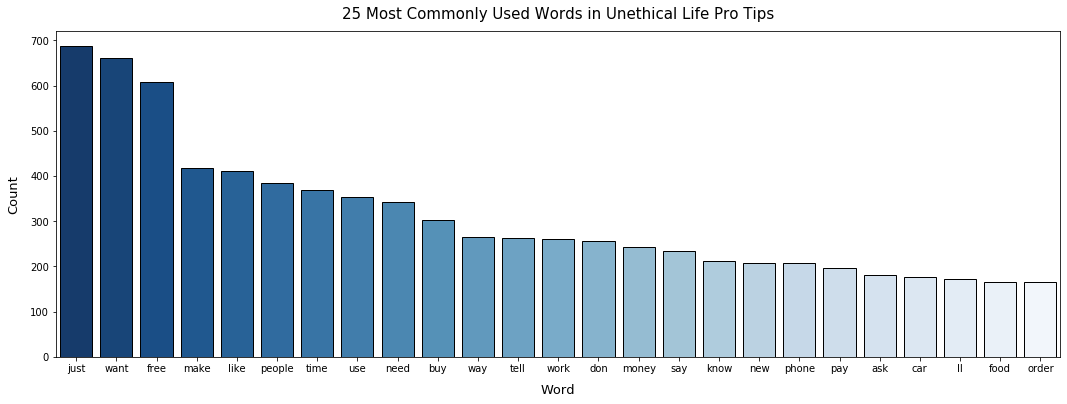

In [37]:
og_ulpt_words_df = get_frequent_words(og_labeled_words_df, og_words_df, 'is_unethical', 1)
plot_frequent_words(og_ulpt_words_df, 'Unethical Life Pro Tips')

The above figure shows the 25 most frequent worrds in the Unethical Life Pro Tips Subreddit.

### Examine Overlap in Frequent Words

In [39]:
og_lpt_set = set(og_lpt_words_df.sort_values('Count', ascending = False)['Word'].tolist()[:25])
og_ulpt_set = set(og_ulpt_words_df.sort_values('Count', ascending = False)['Word'].tolist()[:25])

print('Words in Common:', og_lpt_set & og_ulpt_set) # Intersection
print()
print('Different Words:', og_lpt_set ^ og_ulpt_set) # Symmetric Difference

Words in Common: {'like', 'want', 'know', 'need', 'use', 'make', 'time', 'way', 'work', 'say', 'people', 'phone', 'don', 'just'}

Different Words: {'pay', 'going', 'person', 'try', 'life', 'free', 'food', 'tell', 'ask', 'money', 'help', 'feel', 'day', 'll', 'good', 've', 'things', 'car', 'order', 'buy', 'water', 'new'}


#### Stemmed Text with Stop Words Removed

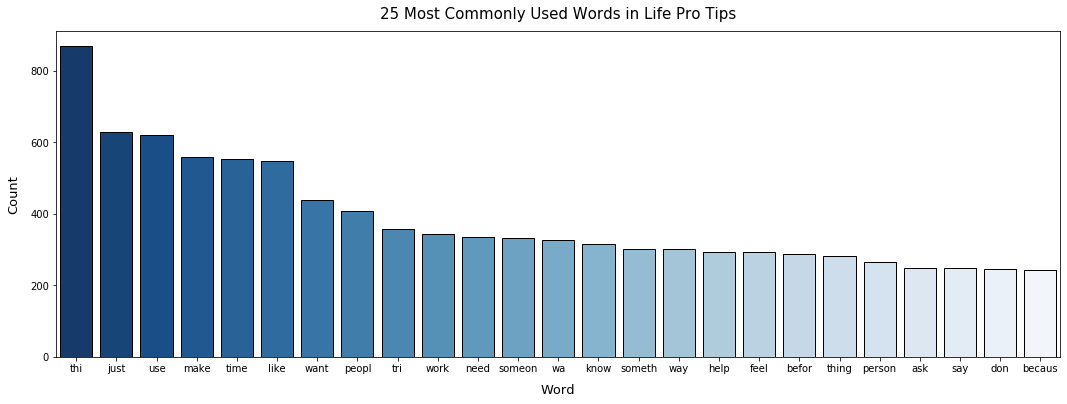

In [42]:
lpt_stemmed_words_df = get_frequent_words(stemmed_labeled_words_df, stemmed_words_df, 'is_unethical', 0)
plot_frequent_words(lpt_stemmed_words_df, 'Life Pro Tips')

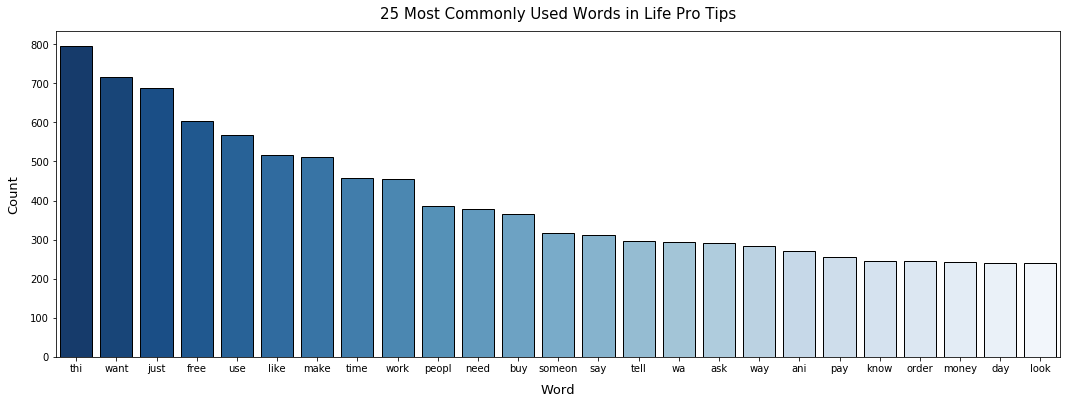

In [43]:
ulpt_stemmed_words_df = get_frequent_words(stemmed_labeled_words_df, stemmed_words_df, 'is_unethical', 1)
plot_frequent_words(ulpt_stemmed_words_df, 'Life Pro Tips')

In [47]:
stemmed_lpt_set = set(lpt_stemmed_words_df.sort_values('Count', ascending = False)['Word'].tolist()[:50])
stemmed_ulpt_set = set(ulpt_stemmed_words_df.sort_values('Count', ascending = False)['Word'].tolist()[:50])

print('Words in Common:', stemmed_lpt_set & stemmed_ulpt_set) # Intersection
print()
print('Different Words:', stemmed_lpt_set ^ stemmed_ulpt_set) # Symmetric Difference

Words in Common: {'like', 'person', 'way', 'start', 'ask', 'tri', 'becaus', 'someth', 'onli', 'll', 'friend', 'use', 'think', 'car', 'peopl', 'say', 'buy', 'phone', 'ani', 'post', 'know', 'ha', 'make', 'tell', 'wa', 'want', 'don', 'just', 'someon', 'day', 'need', 'good', 'time', 'look', 'thi', 'work', 'new'}

Different Words: {'pay', 'card', 'store', 'life', 'free', 'place', 'item', 'instead', 'help', 'better', 'water', 'realli', 'food', 'account', 'onlin', 'money', 'home', 'feel', 'everi', 've', 'return', 'befor', 'chang', 'order', 'alway', 'thing'}


## Analyze Sentiment of Posts

**Note:** Original Text from posts was used for sentiment analysis in order to not lose any emotional inflections.

### Mean Polarity

#### Unethical Life Pro Tips

In [ ]:
subreddits[subreddits['is_unethical']==0]['polarity'].mean()

In [ ]:
plt.figure(figsize = (10,6))
create_hist(subreddits[subreddits['is_unethical']==0],'polarity', num_bins = 25)
set_labels(title = 'Sentiment Analysis Results for Unethical Life Pro Tips', xlabel = 'Polarity Score', ylabel = 'Frequency', title_size = 16, axis_size = 13)

The majority of posts in the Unethical Life Pro Tips subreddit were determined to have a neutral tone.

#### Life Pro Tips

In [ ]:
subreddits[subreddits['is_unethical']==1]['polarity'].mean()

In [ ]:
plt.figure(figsize=(10,6))
create_hist(subreddits[subreddits['is_unethical']==1],'polarity', num_bins = 25)
set_labels(title = 'Sentiment Analysis Results for Life Pro Tips', xlabel = 'Polarity Score', ylabel = 'Frequency', title_size = 16, axis_size = 13)

The majority of posts in the Life Pro Tips subreddit also oseem to have a neutral sentiment.

Overall, the sentiment analysis reveals that the mean polarity is similar between the two subreddits' post. I will see if counts of positive, neutral, and negative posts differs between the subreddits.

### Counts of Positive, Negative, and Neutral Posts

#### Split the Polarity Scores into Categories and Calculate Proportions for Each Category

In [ ]:
# Create Proportions of Categories 

x, y, hue = 'sentiment_cat', 'proportion', 'subreddit'

proportions_df = (subreddits[x]
           .groupby(subreddits[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

# https://github.com/mwaskom/seaborn/issues/1027

#### Plot Bar Graph

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=x, y=y, hue=hue, data=proportions_df, edgecolor = 'black', linewidth = 0.7, palette = [light_blue, medium_blue])
set_labels('Proportions of Sentiments in Posts from Life Pro Tips and Unethical Life Pro Tips Subreddits', 'Sentiment', 'Proportion')


In the graph above and table below, it appears that posts in the Life Pro Tips subreddit might trend to be more positive and less negative than posts in the Unethical Life Pro Tips subreddit, but without error bars, it is hard to tell if this difference is significant.


**Proportion of Posts by Sentiment and Subreddit** 

|Sentiment Category| Life Pro Tips| Unethical Life Pro Tips|
|---|---|---|
|Positive|52.1%|50.5%|
|Neutral|25.3%|24.1%|
|Negative|22.5%|25.3%|

After EDA, I learned that the distributions for post lengths (words and characters) are highly spread out. Although it appears that the posts in Life Pro Tips are longer than those in Unethical Life Pro Tips, the high variability in post lengths must be considered. Additionally, sentiment analysis of the posts revealed that, for both subreddits, the vast majority of posts are neutral or positive. However, looking at counts of each sentiment category revealed that posts in Life Pro Tips might be less negative than posts in Unethical Life Pro Tips.